In [ ]:
import sklearn.decomposition
import pandas as pd
import csv
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy.matlib import repmat
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
import random
import locale
from sklearn.cluster import KMeans
from sklearn import preprocessing

%matplotlib inline

In [ ]:
# Scratched datasets
#df = pd.read_csv'https://raw.githubusercontent.com/dzthai/Cogs118BFinal/main/onlineretail.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/dzthai/Cogs118BFinal/main/Mall_Customers.csv')
# ~Explain why scratched~

# Our chosen dataset is on Google Play Store Applications
df = pd.read_csv('https://raw.githubusercontent.com/dzthai/Cogs118BFinal/main/googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

Hypothesis: Certain application categories prioritize their app ratings over number of installs, or the other way around.

This can determine the app's primary goal and their target audience. i.e. Automobile apps priorize ratings over number of installs because they want to adhere to a smaller target audience who will only download the state-of-the-art app, VERSUS Social Media apps who just want the most amount of installs because their target audience is the entire world.

In [ ]:
# We care about all columns besides the Size, Type (Same as Price), Genres (Same as Category), Last Updated, Current Version, Android Version.
df = df.drop(['Size', 'Type', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1)
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Installs Price Content Rating  
0     159      10,000+     0       Everyone  
1     967     500,000+     0       Everyone  
2   87510   5,000,000+     0       Everyone  
3  215644  50,000,000+     0           Teen  
4     967     100,000+     0       Everyone

In [ ]:
#We can do some Exploratory data vis, maybe make some barcharts to see distributions in rating, installs, etc.
#Similar to first part of: https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3

In [ ]:
# Let's filter out only the rows that have a valid rating <= 5
df = df[df['Rating'] <= 5]

# Change Installs from strings to integers
df['Installs'] = df['Installs'].str.replace(r'\D', '').astype(int)

# Only want to work with apps with 100+ installs
df = df[df['Installs'] >= 100]
df.head()

<ipython-input-5-743675eda545>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Installs'] = df['Installs'].str.replace(r'\D', '').astype(int)


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs Price Content Rating  
0     159     10000     0       Everyone  
1     967    500000     0       Everyone  
2   87510   5000000     0       Everyone  
3  215644  50000000     0           Teen  
4     967    100000     0       Everyone

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


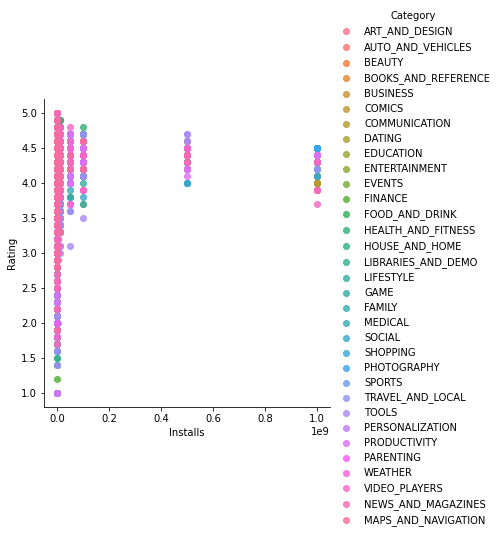

In [ ]:
# Scatter plot on Installs vs Ratings, color coordinated by category
sns.lmplot('Installs', 'Rating', data=df, hue='Category', fit_reg=False)

We can see that the ranges for Intalls are too sparsed out, so it makes our scatterplot spread out too much. We can fix this by taking the log of the Installs column, and then randomizing the numbers from its lower boundary to the next boundary up.

In [ ]:
# 1. Represent on a log scale
df['Log_Installs'] = np.log(df['Installs'])
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs Price Content Rating  Log_Installs  
0     159     10000     0       Everyone      9.210340  
1     967    500000     0       Everyone     13.122363  
2   87510   5000000     0       Everyone     15.424948  
3  215644  50000000     0           Teen     17.727534  
4     967    100000     0       Everyone     11.512925

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


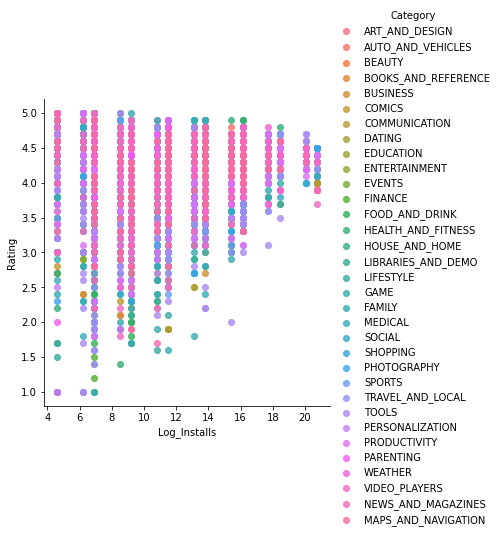

In [ ]:
sns.lmplot('Log_Installs', 'Rating', data=df, hue='Category', fit_reg=False)

In [ ]:
# 2. Randomize install numbers between the ranges
log_ranges = sorted(set(df['Log_Installs'].to_numpy()))
print(log_ranges)

def rfunc(x):
  # preset stopping point in case x ends up being last number in log_ranges
  # ln(1,000,000,000) = 20.72326583694641
  # make stopping point ln(2,000,000,000) = 21.41641302
  # because 5 billion is pretty unrealistic
  stop = 21.41641302
  
  for i in range(len(log_ranges)-1):
    if x == log_ranges[i]:
      stop = log_ranges[i+1] - .000000000000001   # bc random.uniform is inclusive
  return random.uniform(x,stop)

df['RandLog_Installs'] = df['Log_Installs'].apply(lambda x: rfunc(x))
df = df.drop('Log_Installs', axis=1)
df.head()

[4.605170185988092, 6.214608098422191, 6.907755278982137, 8.517193191416238, 9.210340371976184, 10.819778284410283, 11.512925464970229, 13.122363377404328, 13.815510557964274, 15.424948470398375, 16.11809565095832, 17.72753356339242, 18.420680743952367, 20.030118656386467, 20.72326583694641]


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs Price Content Rating  RandLog_Installs  
0     159     10000     0       Everyone          9.416966  
1     967    500000     0       Everyone         13.512176  
2   87510   5000000     0       Everyone         15.648782  
3  215644  50000000     0           Teen         17.788273  
4     967    100000     0       Everyone         12.735888

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


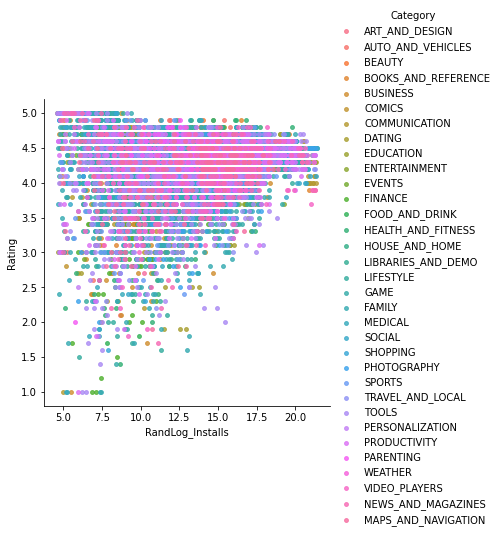

In [ ]:
sns.lmplot('RandLog_Installs', 'Rating', data=df, hue='Category', fit_reg=False, scatter_kws={"s": 15})

RUNNING K-MEANS

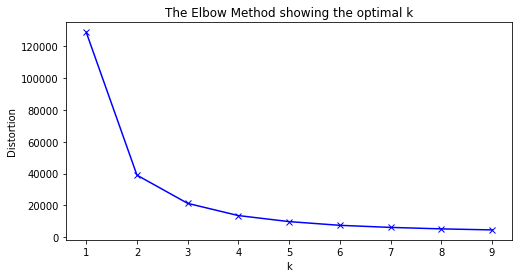

In [ ]:
# Elbow method code taken from: https://predictivehacks.com/k-means-elbow-method-code-for-python/
# The code runs k means clusters from 1-10 and for each value k calculates the 
# sum of squared distances from each point to its center(distortions)
# The dstortions are then plotted where the elbow on the curve is our ideal k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[["RandLog_Installs", "Rating"]])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
def plotCurrent(X, Rank, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rank.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

def calcSqDistances(X, Kmus):
    # We will be calculating the eucladian distance between the points
    # Calculate matrix product
    product = X @ Kmus.T

    # Square then sum all values in each matrix
    Xsquared = np.square(X)
    Ksquared = np.square(Kmus)
    Xsum = np.sum(Xsquared, axis=1)
    Ksum = np.sum(Ksquared, axis=1)

    # multiply the product matrix by -2 first before adding to the others
    product *= -2
    sqDmat = (product + Ksum.T).T + Xsum

    return sqDmat.T

def recalcMus(X, Rank):
    # Recalculate the center of the cluster
    # np.divide - matrix divide, to take average divide all of them
    sumranks = np.sum(Rank, axis=0)
    product = X.T @ Rank
    # divide by the sum to get averages and then retranspose
    avgs = np.divide(product, sumranks).T
    return avgs

def runKM(K, df):
    # Allocate space for Kmus
    Kmus = np.zeros((K, df.shape[1]))
    

    # Randomly picking points from the data as cluster centers
    rndinds = np.random.permutation(df.shape[0])
    Kmus = df[rndinds[:K]];
    
    # Maximum iterations to run k means algorithm
    maxiters = 1000;

    for iter in range(maxiters):
      # Calculate squared distances between data and mu vectors. Given the 
      # minimum values we recalculate our mu vecotors 

      # sqDmat will be an N-by-K matrix with the squared distance from the nth 
      # data vector to the kth mu vector
      sqDmat = calcSqDistances(df, Kmus);

      # given the matrix of squared distances, determine the closest cluster
      # center for each data vector 

      # Get number of columns
      cols = len(sqDmat[0])
      # Create matrix with 1's across the diagonals and zeros everywhere else
      diagonals = np.eye(cols)
      # Get the minimum values in sqDmat
      minvals = np.argmin(sqDmat, axis=1)
      # Set rank equal to the matrix showing which columns hold the smaller values
      Rank = diagonals[minvals]

      # Save current Kmus to KmusOld   
      KmusOld = Kmus
      plotCurrent(df, Rank, Kmus)
      plt.show()

      # Recalculate kmus/center of clusters
      Kmus = recalcMus(df, Rank)

      # K means is done when cluster centers have converged 
      if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
        break
    plotCurrent(df,Rank,Kmus)

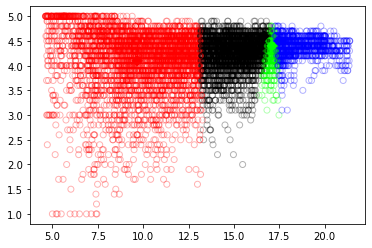

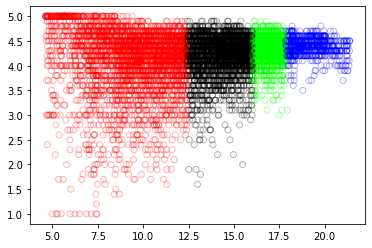

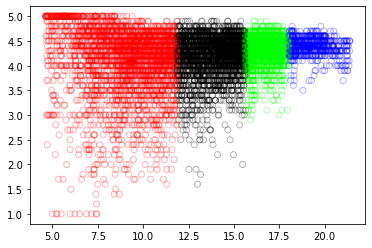

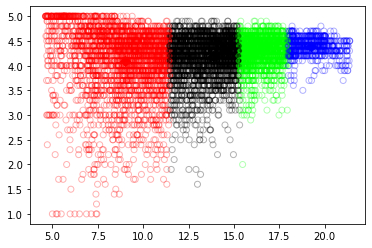

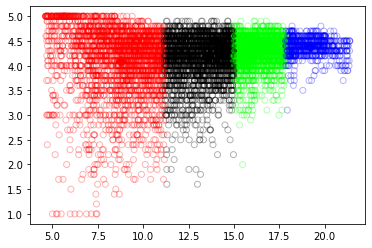

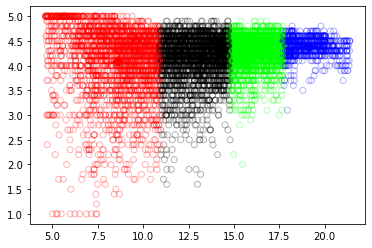

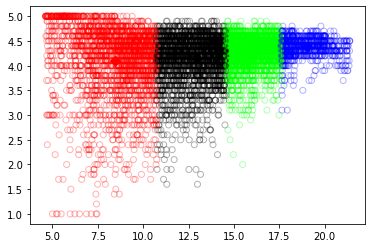

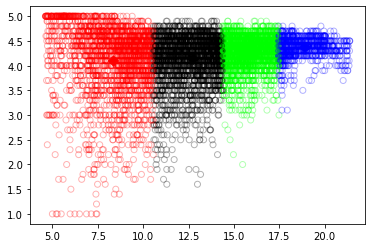

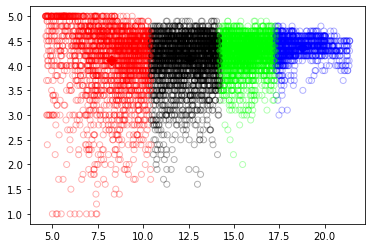

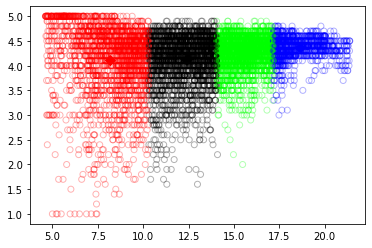

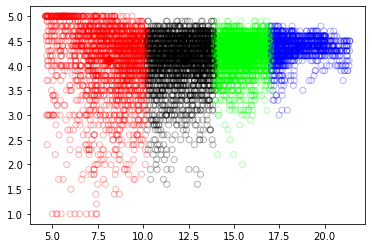

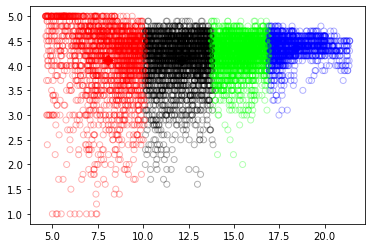

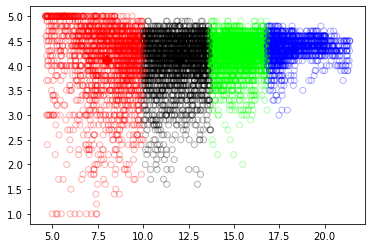

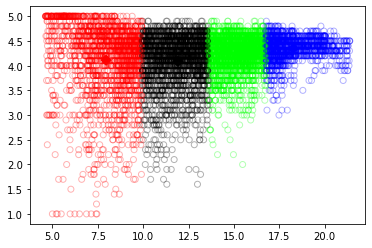

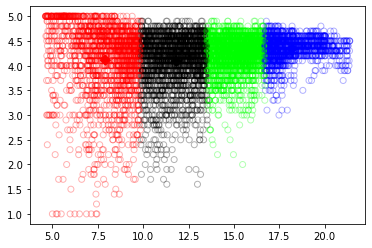

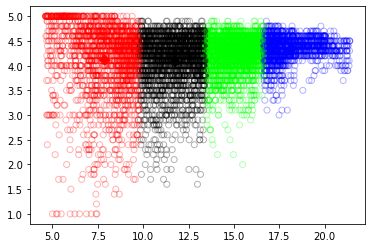

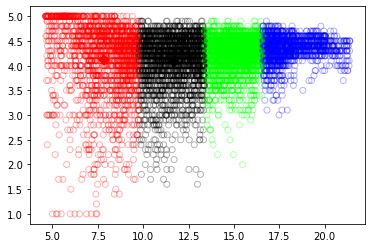

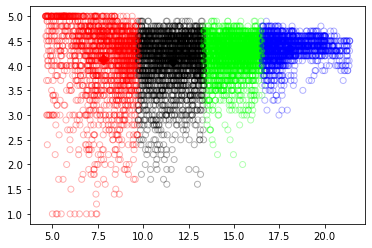

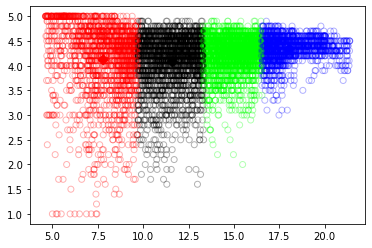

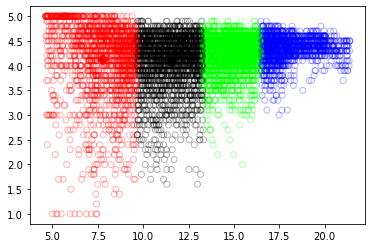

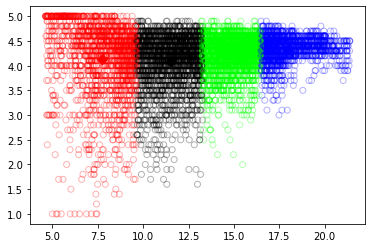

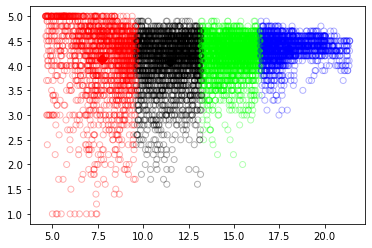

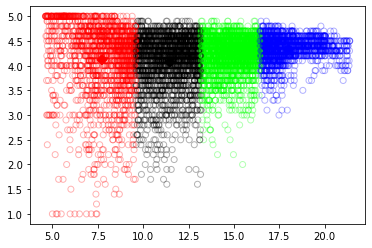

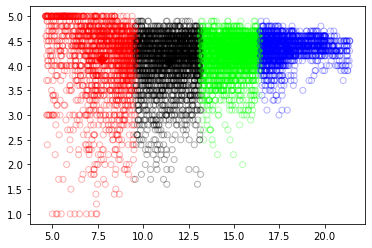

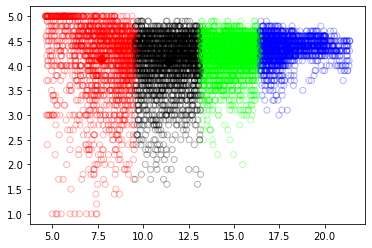

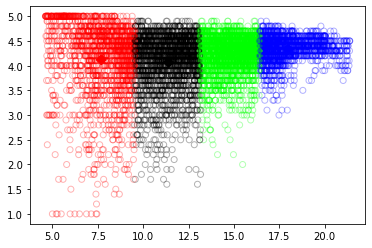

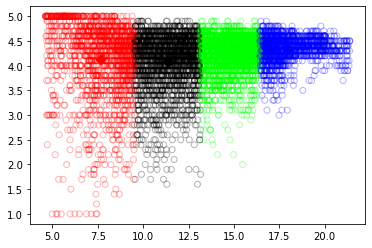

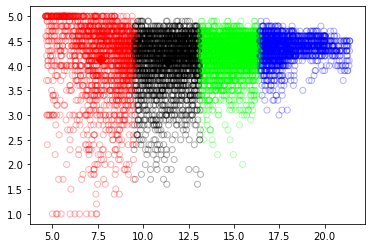

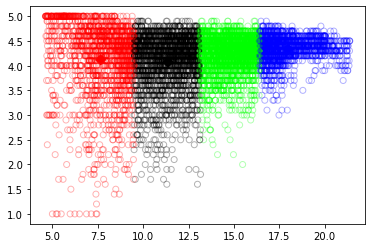

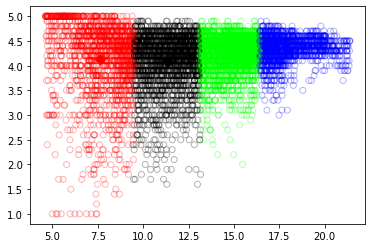

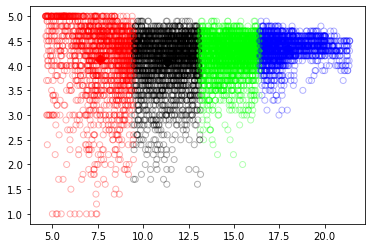

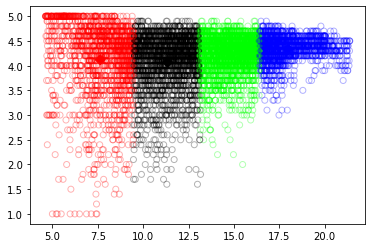

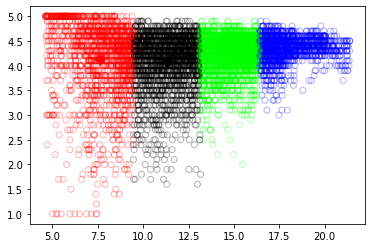

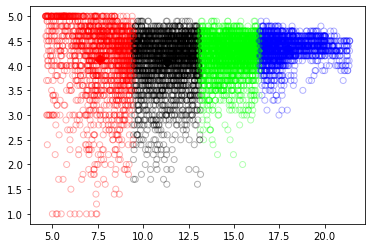

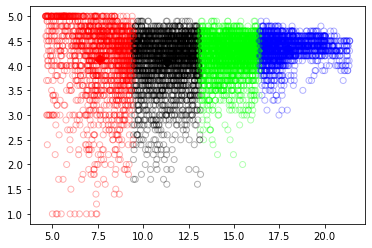

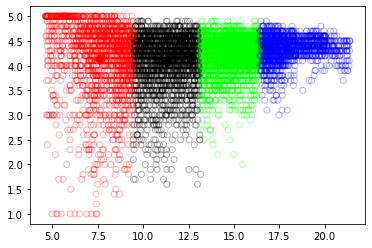

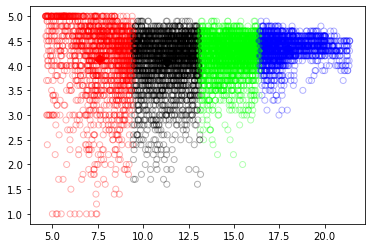

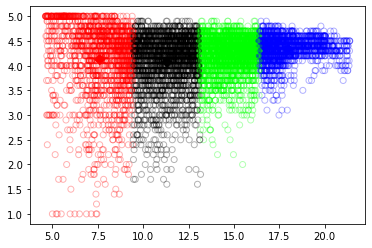

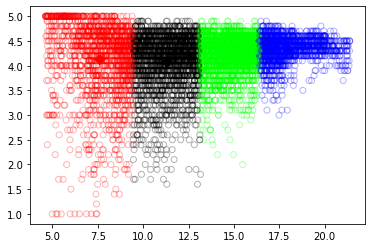

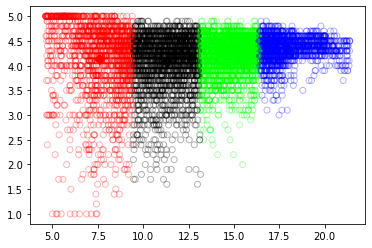

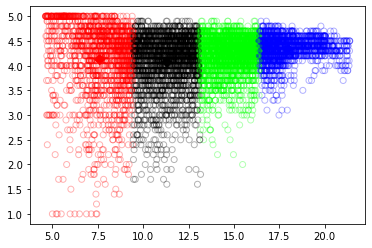

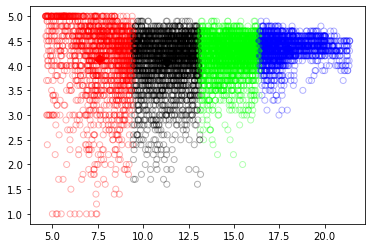

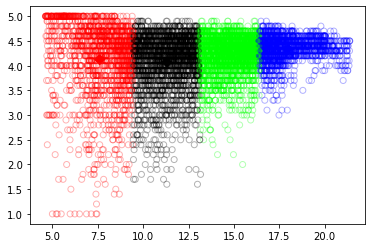

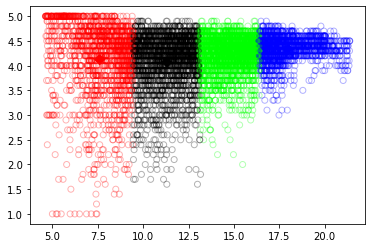

In [ ]:
df_tester = df[["RandLog_Installs", "Rating"]]
df_tester = df_tester[:].values
runKM(4, df_tester)

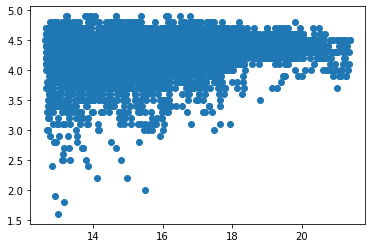

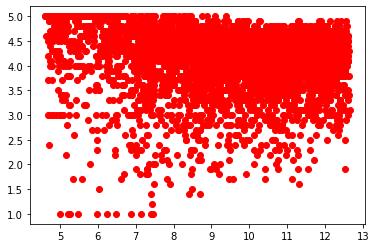

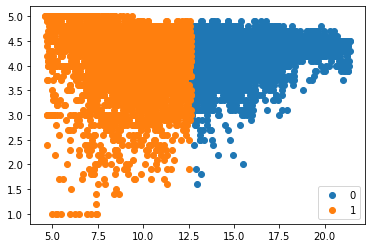

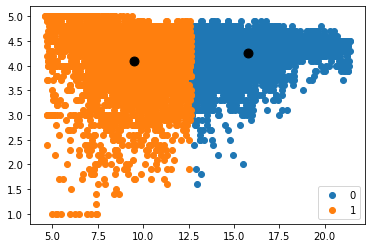

In [ ]:
#THIS CODE IS FROM https://www.askpython.com/python/examples/plot-k-means-clusters-python

kmeans = KMeans(n_clusters= 2)
labels = kmeans.fit_predict(df_tester)
 
#filter rows of original data (THIS IS IF YOU ONLY WANT TO SEE CLUSTER 0)
filtered_label0 = df_tester[labels == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()


#filter rows of original data (CLUSTERS 1 and 2 RESPECTIVELY)
filtered_label1 = df_tester[labels == 1]
 
filtered_label2 = df_tester[labels == 2]
 
#Plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.show()

#Getting unique labels
 
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_tester[labels == i , 0] , df_tester[labels == i , 1] , label = i)
plt.legend()
plt.show()

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_tester[labels == i , 0] , df_tester[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


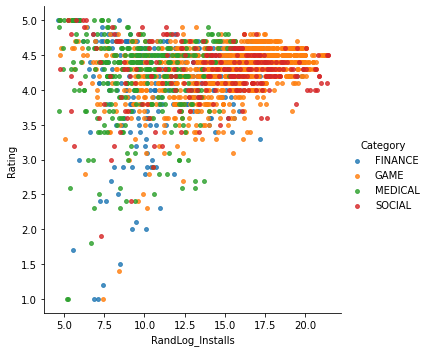

In [ ]:
Category_list = ['GAME','SOCIAL','MEDICAL', 'FINANCE']
df_filtered = df[df['Category'].isin(Category_list)]
sns.lmplot('RandLog_Installs', 'Rating', data=df_filtered, hue='Category', fit_reg=False, scatter_kws={"s": 15})

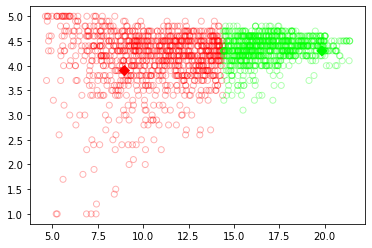

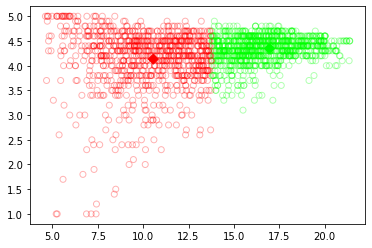

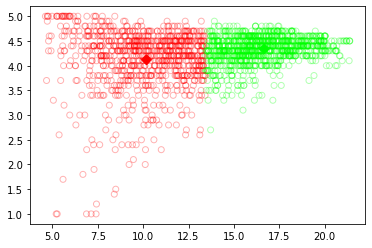

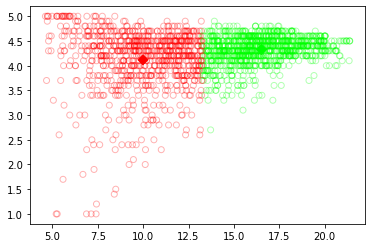

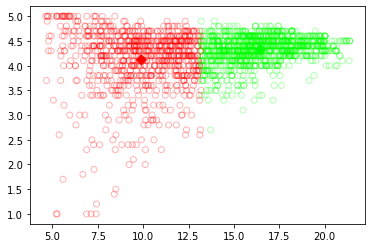

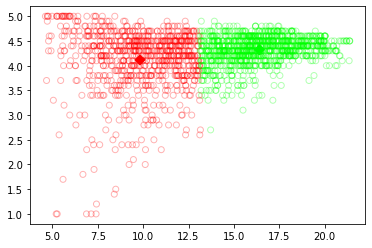

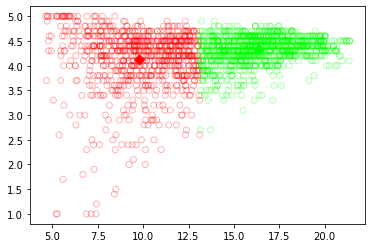

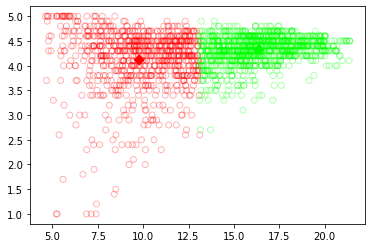

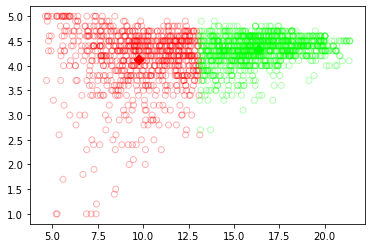

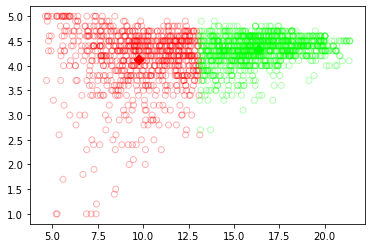

In [ ]:
df_filtered = df_filtered[["RandLog_Installs", "Rating"]]
df_filtered = df_filtered[:].values
runKM(2, df_filtered)

In [ ]:
#Code FROM https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

from sklearn.metrics import silhouette_score
# Calculate Silhoutte Score
#
scores = {}
temp = [2,3,4,5,6,7,8,9,10]
for i in temp:
  kmeans = KMeans(n_clusters= i)
  labels = kmeans.fit_predict(df_tester)
  score = silhouette_score(df_tester, kmeans.labels_, metric='euclidean')
  scores[i] = score


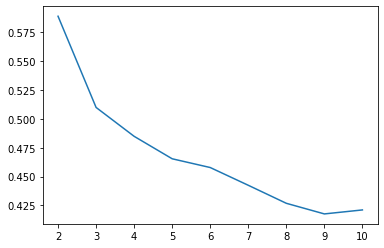

In [ ]:
plt.plot(temp, list(scores.values()))

In [ ]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500])

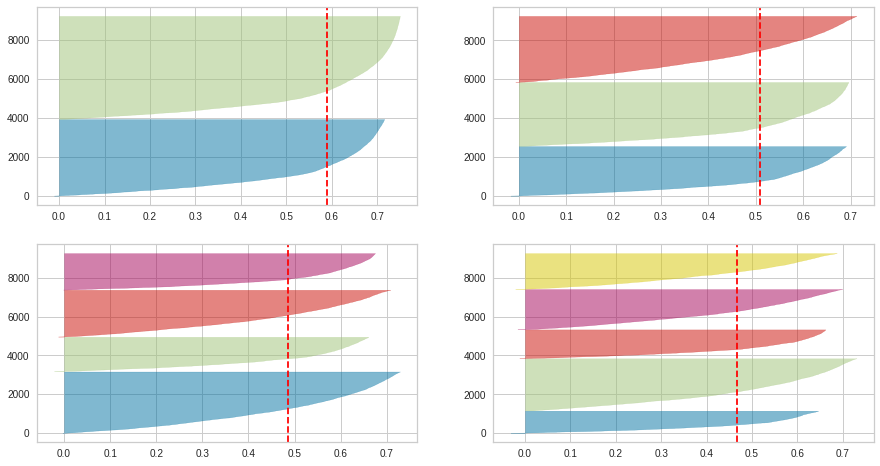

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_tester)

**PRINCIPLE COMPONENT ANALYSIS**

In [ ]:
# Drop columns we don't want in our PCA
df2 = df.copy()
df2 = df2.drop('App', axis=1)             # App name doesn't matter
df2 = df2.drop('Installs', axis=1)        # Just want RandLog
df2 = df2.drop('Price', axis=1)           # Most of them free, doesn't make a big difference
df2 = df2.drop('Category', axis=1)        # We'll add this back in!

In [ ]:
# Use LabelEncoder to turn Content Rating into numerical representations
le = preprocessing.LabelEncoder()
le.fit(df2['Content Rating'])
list(le.classes_)
df2['Content Rating'] = le.transform(df2['Content Rating'])

In [ ]:
# Change Installs from strings to integers
df2['Reviews'] = df2['Reviews'].str.replace(r'\D', '').astype(int)
# Log the reviews section so the range isn't crazy either
df2['Reviews'] = np.log(df2['Reviews'])
df2.head()

<ipython-input-24-f40a43d1515b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Reviews'] = df2['Reviews'].str.replace(r'\D', '').astype(int)


Rating    Reviews  Content Rating  RandLog_Installs
0     4.1   5.068904               1          9.416966
1     3.9   6.874198               1         13.512176
2     4.7  11.379508               1         15.648782
3     4.5  12.281384               4         17.788273
4     4.3   6.874198               1         12.735888

In [ ]:
# Change to a numpy array for PCA
data = df2.to_numpy()
data = data.T
print(data)

[[ 4.1         3.9         4.7        ...  5.          4.5
   4.5       ]
 [ 5.0689042   6.8741985  11.37950835 ...  1.38629436  4.73619845
  12.89497834]
 [ 1.          1.          1.         ...  1.          3.
   1.        ]
 [ 9.41696642 13.51217617 15.64878177 ...  4.72483974  8.00785899
  16.15228929]]


In [ ]:
# Created an eigsort function
#if (D[0] < D[1]):
    # Flip eigvals array and V matrix by columns
    #D = D[::-1]
    #V[:, [0, 1]] = V[:, [1, 0]]
def eigsort(Vold, eigvals):
  # Sort columns from greatest eigenvalue to smallest
  V = Vold
  D = eigvals
  mix = D.argsort()[::-1]   
  D = D[mix]
  V = V[:,mix]
  return V, D

In [ ]:
mean = np.mean(data, axis=1, keepdims = True)
mean.shape

(4, 1)

In [ ]:
A = data - mean
covA = (A @ A.T) / 100
covA.shape

(4, 4)

In [ ]:
eigvals, Vold = np.linalg.eig(covA)
print(eigvals)
print(Vold)

[2546.31276502   19.72314708   59.90607481   96.55854939]
[[ 0.01968946  0.96475905  0.26116393 -0.02541085]
 [ 0.71698052 -0.19559094  0.65534512 -0.13492917]
 [ 0.03043492  0.0342464  -0.22353489 -0.97361854]
 [ 0.69615011  0.17265963 -0.67256846  0.1822508 ]]


In [ ]:
V, D = eigsort(Vold, eigvals)
print(D)
print(V)

[2546.31276502   96.55854939   59.90607481   19.72314708]
[[ 0.01968946 -0.02541085  0.26116393  0.96475905]
 [ 0.71698052 -0.13492917  0.65534512 -0.19559094]
 [ 0.03043492 -0.97361854 -0.22353489  0.0342464 ]
 [ 0.69615011  0.1822508  -0.67256846  0.17265963]]


In [ ]:
C = V.T @ A
C.shape

(4, 9229)

In [ ]:
# Put back into a dataframe, and add our Categories back in!
df3 = pd.DataFrame({'PC0': C[0],
                   'PC1': C[1],
                   'PC2': C[2],
                   'PC3': C[3]})
df3['Category'] = df['Category']
df3.head()

PC0       PC1       PC2       PC3        Category
0 -5.015616  0.268655  0.335783 -0.071085  ART_AND_DESIGN
1 -0.874313  0.776505 -1.287668  0.089942  ART_AND_DESIGN
2  3.859056  0.537677  0.436783  0.349457  ART_AND_DESIGN
3  6.082457 -2.109862 -1.133969  0.452249  ART_AND_DESIGN
4 -1.406850  0.624862 -0.661095  0.341812  ART_AND_DESIGN

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


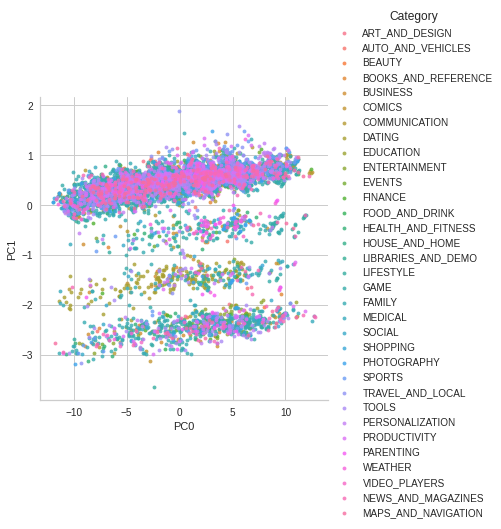

In [ ]:
sns.lmplot('PC0', 'PC1', data=df3, hue='Category', fit_reg=False, scatter_kws={"s": 15})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


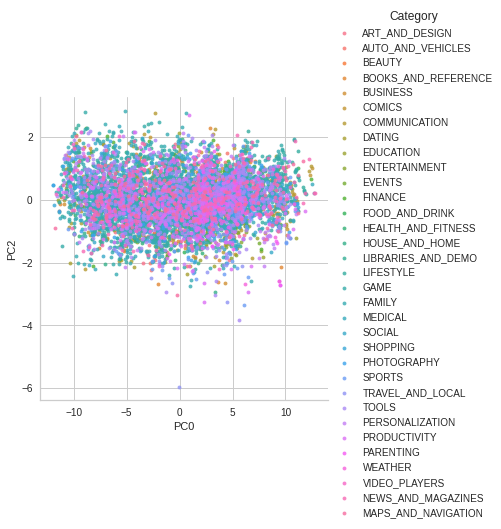

In [ ]:
sns.lmplot('PC0', 'PC2', data=df3, hue='Category', fit_reg=False, scatter_kws={"s": 15})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


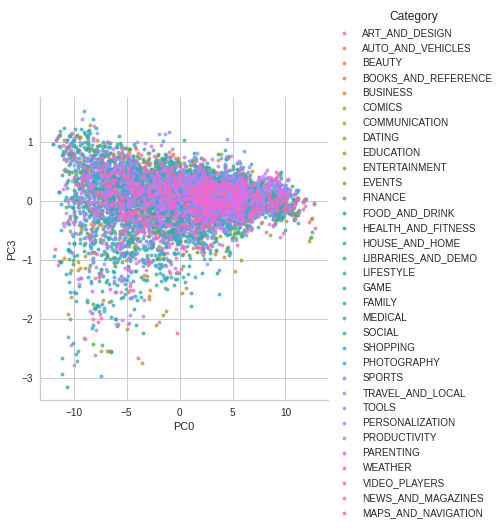

In [ ]:
sns.lmplot('PC0', 'PC3', data=df3, hue='Category', fit_reg=False, scatter_kws={"s": 15})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


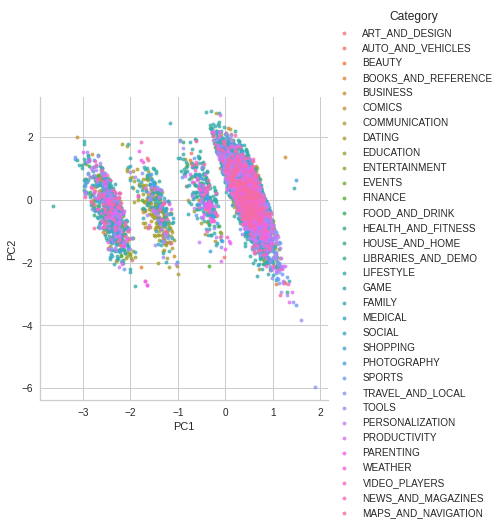

In [ ]:
sns.lmplot('PC1', 'PC2', data=df3, hue='Category', fit_reg=False, scatter_kws={"s": 15})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


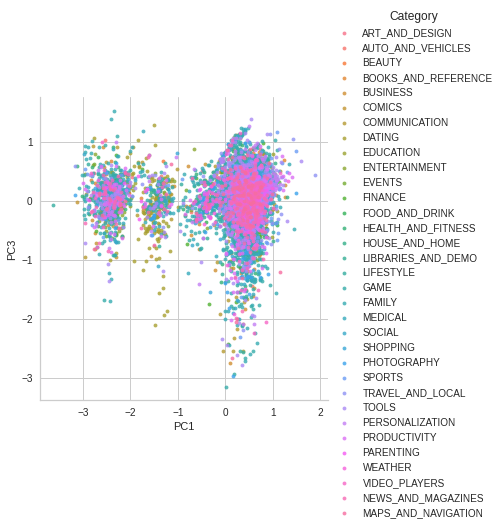

In [ ]:
sns.lmplot('PC1', 'PC3', data=df3, hue='Category', fit_reg=False, scatter_kws={"s": 15})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


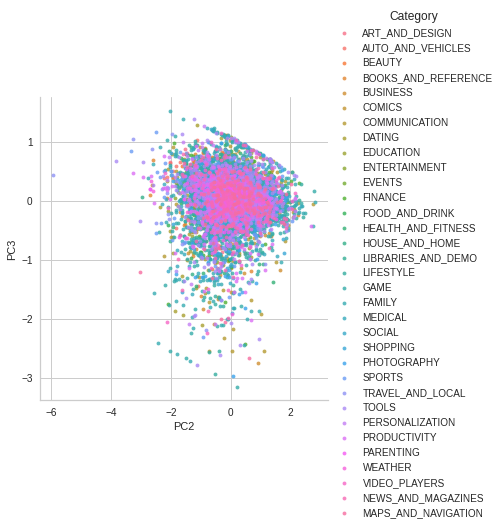

In [ ]:
sns.lmplot('PC2', 'PC3', data=df3, hue='Category', fit_reg=False, scatter_kws={"s": 15})

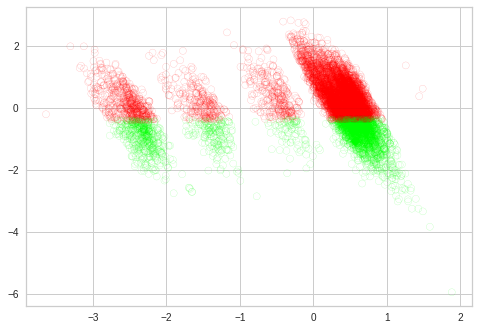

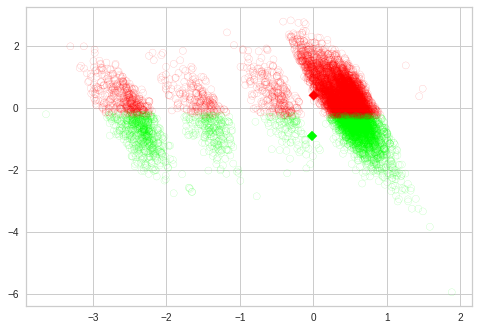

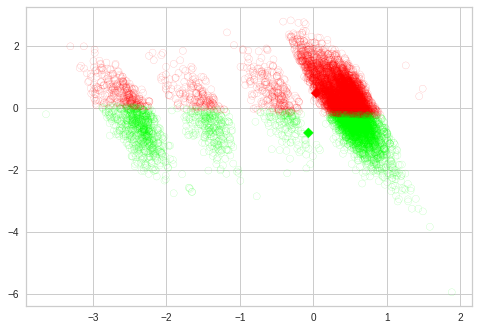

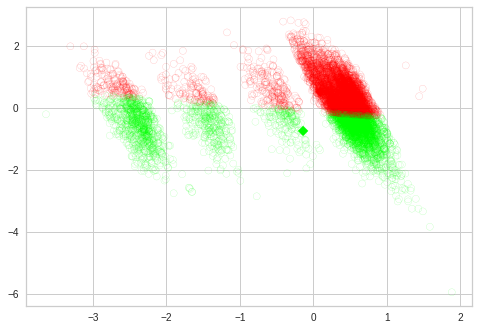

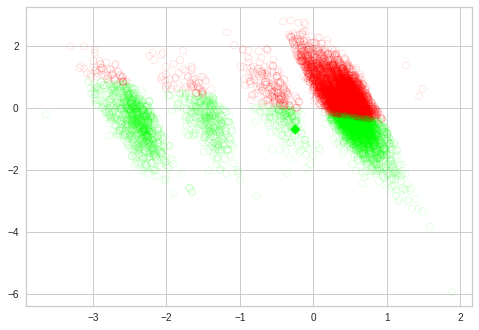

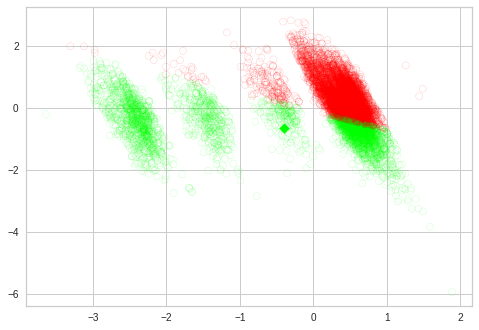

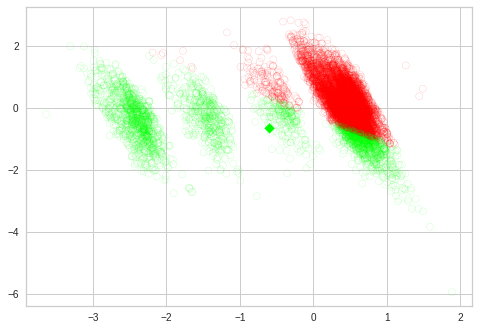

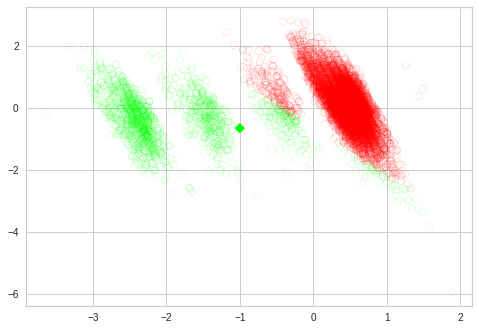

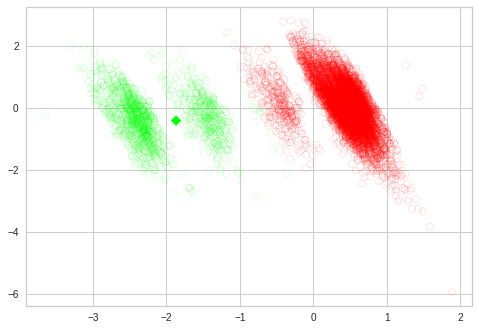

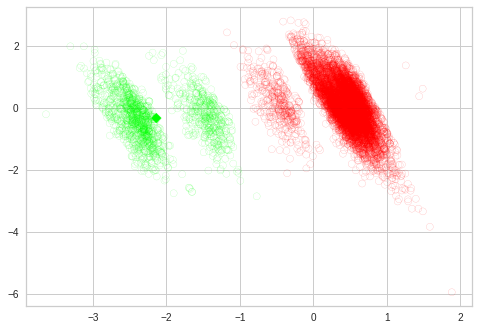

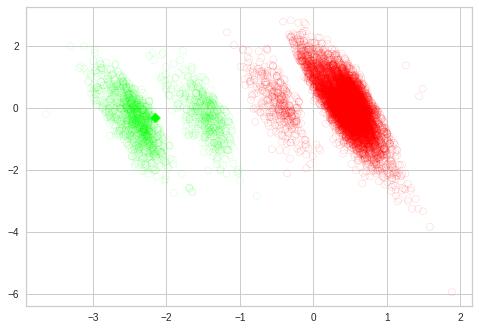

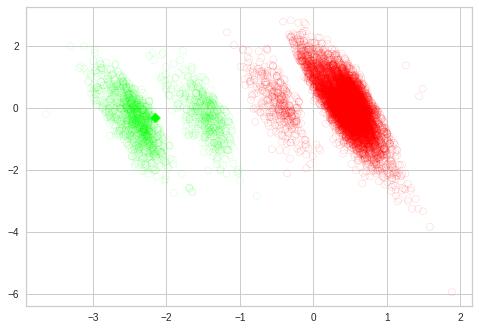

In [ ]:
df3_tester = df3[["PC1", "PC2"]]
df3_tester = df3_tester[:].values
runKM(2, df3_tester)